# EDM Genre Classification - EDA and Cleaning

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
sns.set(style='darkgrid')
    
import pickle

#### Feature Definitions

Definitions found on the Spotify [web API reference page](https://developer.spotify.com/documentation/web-api/reference/#category-tracks).

- **Duration (ms)** - The duration of the track in milliseconds.
- **Acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **Danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **Energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **Instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **Key** - The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- **Liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **Loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- **Mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **Speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **Tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **Time Signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- **Valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

## Total Population EDA

In [2]:
# Open pickled raw audio data
with open('checkpoints/pickle_raw_audio_data.pickle', 'rb') as read_file:
    all_genres = pickle.load(read_file)
    
with open('checkpoints/pickle_raw_audio_data_recs.pickle', 'rb') as read_file:
    all_genres_recs = pickle.load(read_file)

In [3]:
all_genres.head()

0  acousticness                                       analysis_url  \
0  NaN      0.000259  https://api.spotify.com/v1/audio-analysis/3jMe...   
1  NaN      0.014500  https://api.spotify.com/v1/audio-analysis/22og...   
2  NaN      0.012300  https://api.spotify.com/v1/audio-analysis/50MU...   
3  NaN      0.005330  https://api.spotify.com/v1/audio-analysis/2Ljv...   
4  NaN      0.021700  https://api.spotify.com/v1/audio-analysis/62L2...   

   danceability  duration_ms  energy                      id  \
0         0.543     283846.0   0.957  3jMeKUXY5zgssDEQaBcaFZ   
1         0.483     280086.0   0.847  22ogGXbpxlfWkaFPSDK944   
2         0.704     314695.0   0.702  50MU6Vg8RklxzN2dbaIikw   
3         0.558     325869.0   0.978  2LjvfWvJZWGUnHN1xXZKAM   
4         0.362     342152.0   0.926  62L2PaETBJ7gf0xWQ6Tz3Y   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0            0.0112  1.0    0.3170    -1.949   1.0       0.3080  174.011   
1            0.7550  1.0    0.1080    -5.473   1.0       0.0375  174.032   
2            0.2380  2.0    0.1750    -2.927   1.0       0.1080   86.962   
3            0.8080  7.0    0.6110    -3.109   1.0       0.0396  173.978   
4            0.9250  5.0    0.0686    -4.950   1.0       0.0435  174.003   

   time_signature                                         track_href  \
0             4.0  https://api.spotify.com/v1/tracks/3jMeKUXY5zgs...   
1             4.0  https://api.spotify.com/v1/tracks/22ogGXbpxlfW...   
2             4.0  https://api.spotify.com/v1/tracks/50MU6Vg8Rklx...   
3             4.0  https://api.spotify.com/v1/tracks/2LjvfWvJZWGU...   
4             4.0  https://api.spotify.com/v1/tracks/62L2PaETBJ7g...   

             type                                   uri  valence genre  
0  audio_features  spotify:track:3jMeKUXY5zgssDEQaBcaFZ   0.2760   dnb  
1  audio_features  spotify:track:22ogGXbpxlfWkaFPSDK944   0.1580   dnb  
2  audio_features  spotify:track:50MU6Vg8RklxzN2dbaIikw   0.0963   dnb  
3  audio_features  spotify:track:2LjvfWvJZWGUnHN1xXZKAM   0.4160   dnb  
4  audio_features  spotify:track:62L2PaETBJ7gf0xWQ6Tz3Y   0.0518   dnb

In [4]:
# Drop irrelevant columns
cols = ['uri', 'genre', 'duration_ms', 'acousticness', 'danceability', 'energy',
        'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
        'time_signature', 'valence']

all_genres = all_genres[cols]
all_genres_recs = all_genres_recs[cols]

In [5]:
format_dict = {'count' : '{:0.0f}',
               'mean' : '{:0.04f}',
               'std' : '{:0.04f}',
               'min' : '{:0.04f}',
               '25%' : '{:0.04f}',
               '50%' : '{:0.04f}',
               '75%' : '{:0.04f}',
               'max' : '{:0.04f}'}

all_genres.describe().T.style.format(format_dict)

### Feature Distributions - Total Population

In [170]:
def plot_hist(df, metric, log=False):
    """
    Plot linear and log scale histograms for 4 provided metrics.
    """
    fig, axes = plt.subplots(2, 2, figsize=[16, 8])
    fig.tight_layout(pad=3.0)
    fig.subplots_adjust(top=0.9)

    for i in range(0,4):
        plt.subplot(2,2,i+1) # (number of rows, number of columns, number of plot)
        plt.hist(df[metric[i]], bins=30)
        plt.title(metric[i])
        plt.axvline(df[metric[i]].median(), color='Red')
        if log:
            plt.yscale('log')
            plt.suptitle('Log Scale', fontweight='bold', fontsize=22)
        else:
            plt.suptitle('Linear Scale', fontweight='bold', fontsize=22)
        
    plt.show();

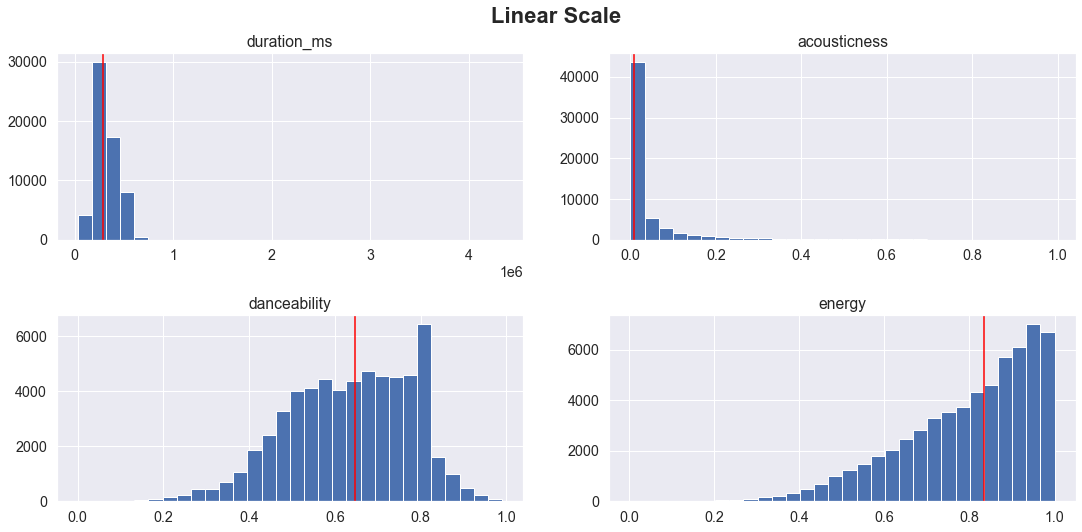

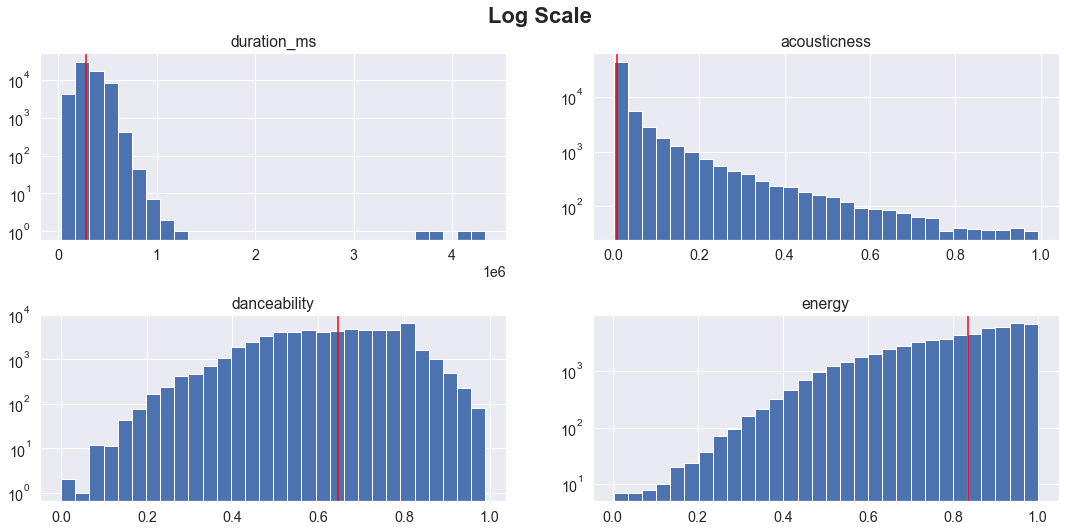

In [171]:
plot_hist(all_genres, ['duration_ms', 'acousticness', 'danceability', 'energy'])
plot_hist(all_genres, ['duration_ms', 'acousticness', 'danceability', 'energy'], log=True)

In [172]:
print('Median Duration:     ' + str(all_genres['duration_ms'].median()) + ' ms')
print('Median Acousticness: ' + str(all_genres['acousticness'].median()))
print('Median Danceability: ' + str(all_genres['danceability'].median()))
print('Median Eneregy:      ' + str(all_genres['energy'].median()))

Median Duration:     282846.0 ms
Median Acousticness: 0.00753
Median Danceability: 0.647
Median Eneregy:      0.835


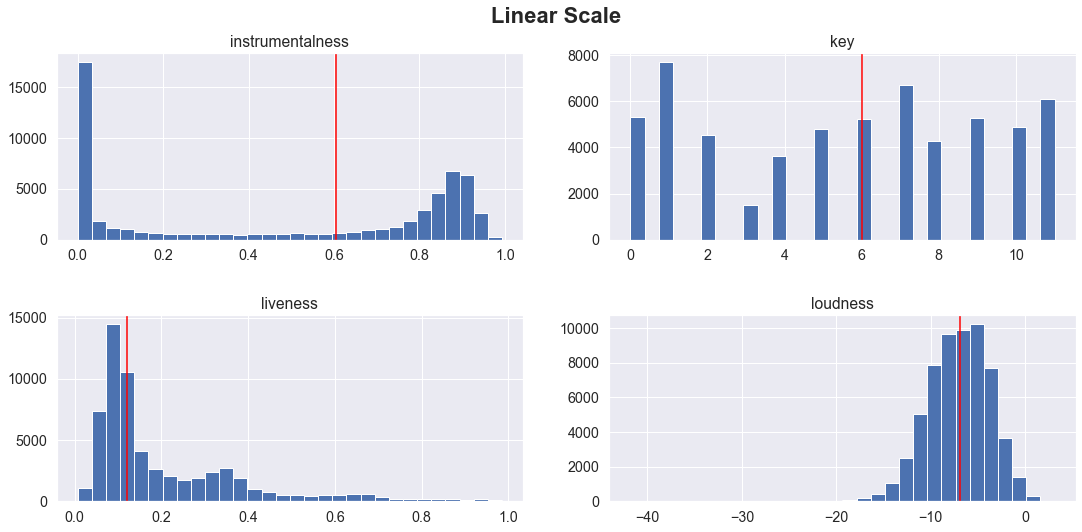

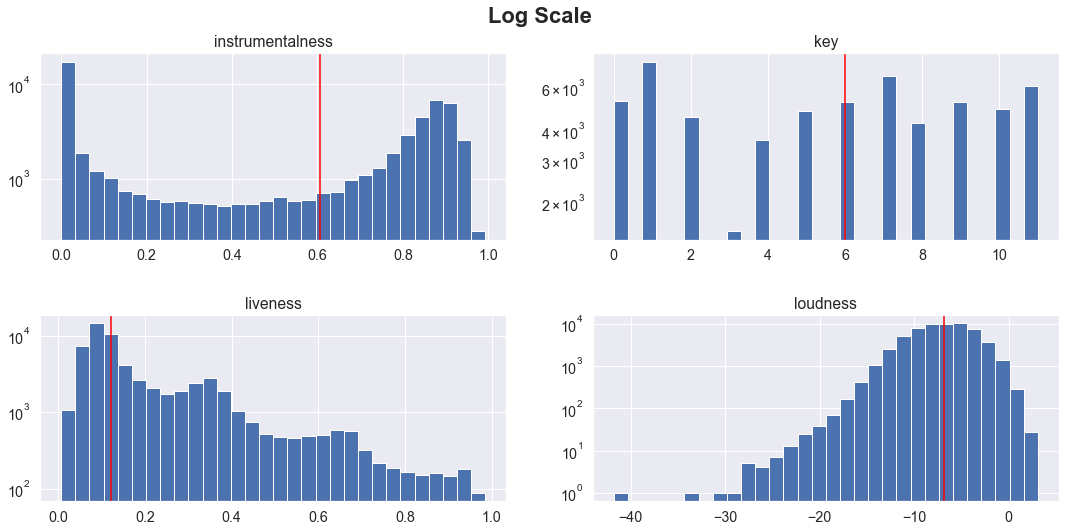

In [173]:
plot_hist(all_genres, ['instrumentalness', 'key', 'liveness', 'loudness'])
plot_hist(all_genres, ['instrumentalness', 'key', 'liveness', 'loudness'], log=True)

In [174]:
print('Median Instrumentalness: ' + str(all_genres['instrumentalness'].median()) + ' ms')
print('Median Key:              ' + str(all_genres['key'].median()) + ' ms')
print('Median Liveness:         ' + str(all_genres['liveness'].median()) + ' ms')
print('Median Loudness:         ' + str(all_genres['loudness'].median()) + ' ms')

Median Instrumentalness: 0.605 ms
Median Key:              6.0 ms
Median Liveness:         0.121 ms
Median Loudness:         -6.874 ms


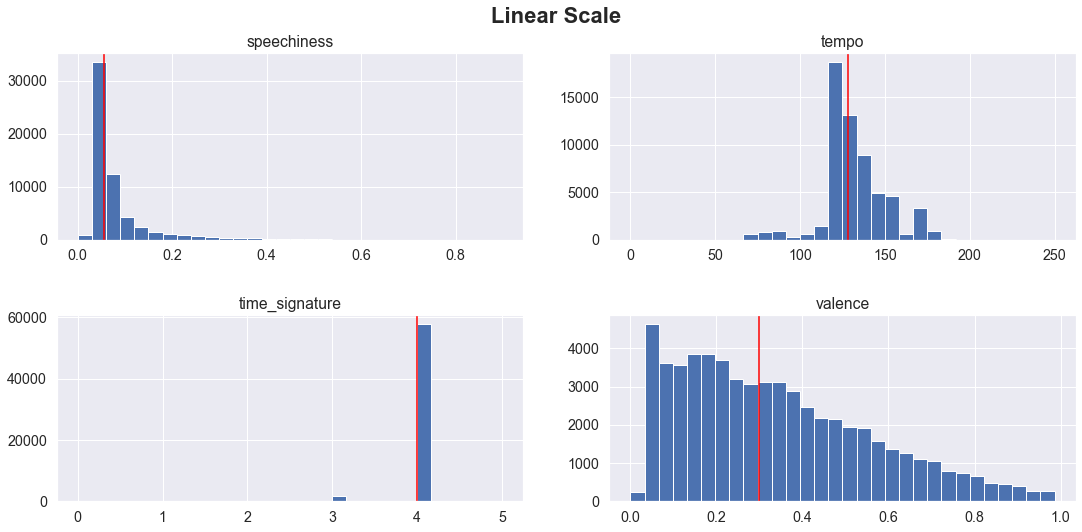

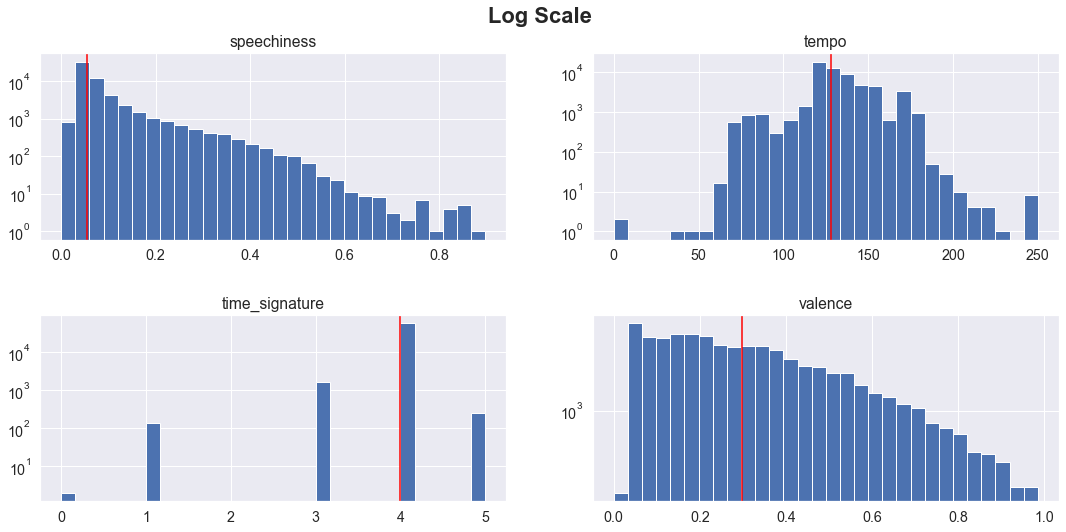

In [175]:
plot_hist(all_genres, ['speechiness', 'tempo', 'time_signature', 'valence'])
plot_hist(all_genres, ['speechiness', 'tempo', 'time_signature', 'valence'], log=True)

In [176]:
print('Median Speechiness:    ' + str(all_genres['speechiness'].median()))
print('Median Tempo:          ' + str(all_genres['tempo'].median()) + ' bpm')
print('Median Time Signature: ' + str(all_genres['time_signature'].median()))
print('Median Valence:        ' + str(all_genres['valence'].median()))

Median Speechiness:    0.0548
Median Tempo:          127.996 bpm
Median Time Signature: 4.0
Median Valence:        0.298


### Exploring Lows and Highs

I will sample from the lowest and highest scoring songs for all audio features to determine whether these are legitimate EDM songs that should be included in the dataset. By exploring these features, I hope to find reasonable cutoffs for excluding erroneous data as needed.

In [177]:
def low_high_uris(df, metric, sample_size=5, high_qrt=0.00001, low_qrt=0.99999, high_low='both'):
    """
    Return a sample of the highest and lowest scoring tracks for a given metric and dataframe.
    """
    q_high = df[metric].quantile(high_qrt)
    q_low = df[metric].quantile(low_qrt)
    
    try:
        high = df[(df[metric] >= q_high)][['uri', metric]].sample(sample_size, random_state=13)
    except ValueError:
        high = None
    try:
        low = df[(df[metric] <= q_low)][['uri', metric]].sample(sample_size, random_state=13)
    except ValueError:
        low = None
    
    if high_low == 'both':
        return pd.concat([high, low]).sort_values(metric)
    elif high_low == 'low':
        return low.sort_values(metric)
    elif high_low == 'high':
        return high.sort_values(metric)

#### Low/High - Acousticness

In [456]:
acousticness_low_high = low_high_uris(all_genres, 'acousticness', sample_size=5, high_qrt=0.95, low_qrt=0.05)
acousticness_low_high

uri  acousticness
3609   spotify:track:7pnnxs2RyUc8GFOTfT7vUf      0.000013
4358   spotify:track:1Fll9O1TvIIXh6oh4vKLmM      0.000015
10292  spotify:track:3NHvpeqAtHVydN6nLEnfDG      0.000035
227    spotify:track:7uEZiQAO47lhtGJydkRdHZ      0.000076
2986   spotify:track:3CuaOmr2ZTfeWDRFKVoyfU      0.000079
2178   spotify:track:7vrtRaPePTGxRqHYIxTWwP      0.298000
6612   spotify:track:6hD2s1NNlaFZtNDe0zwPXQ      0.328000
9105   spotify:track:4r5fxkDJ0gr8EQPba4D0ne      0.525000
2370   spotify:track:7AysN4FoUjZqWnwRhsQAf9      0.840000
3352   spotify:track:1V9ap3RBg6FvHN8yOlXz4j      0.923000

In [457]:
acousticness_high = low_high_uris(all_genres, 'acousticness', sample_size=5, high_qrt=0.998, high_low='high')
acousticness_high

uri  acousticness
10280  spotify:track:6qFdHuZbxgherse0girmbs         0.968
4624   spotify:track:7bt1xEpPsr4fsFCFDFoYb3         0.978
6149   spotify:track:4Ra7jiOPeGMu4q9qr2peNa         0.897
862    spotify:track:7wHsXayDJ7t5EAqwTHDODa         0.895
2960   spotify:track:7869uUWRLmepe6eaRxoqpa         0.912

In [458]:
acousticness_super_high = low_high_uris(all_genres, 'acousticness', sample_size=5, high_qrt=0.999, high_low='high')
acousticness_super_high

uri  acousticness
9120  spotify:track:2YjRYDb01EFotKujBkOXJQ         0.939
5303  spotify:track:74m8IKdAATRhxHXAp5womb         0.940
7249  spotify:track:0NYmQAHfHlG18sFYRLcQ8b         0.940
9294  spotify:track:5Q5MFVjUWVNgb7XBerPdbQ         0.969
2391  spotify:track:60jShSAD058XQYsCjiKb8T         0.949

#### Low/High - Danceability

In [459]:
danceability_low_high = low_high_uris(all_genres, 'danceability', sample_size=5, high_qrt=0.95, low_qrt=0.05)
danceability_low_high

uri  danceability
8330  spotify:track:7y2YUIyCuVhBidENVT0068         0.258
5836  spotify:track:1uugLBNBYtXix8ISS4utV7         0.313
7358  spotify:track:39IHCKDqMC7nQsSXHL9rKa         0.327
1729  spotify:track:7CKFGyBsqXDGgvQoZ72Q6s         0.337
549   spotify:track:7IJqKhxXyqPeyPVFiCPNjf         0.388
1018  spotify:track:66W1rVTnEv86dIkFhoiElg         0.848
825   spotify:track:1GDNXCocly1HyaJ3cyqUMZ         0.852
3726  spotify:track:0hxQ8xwaI42LrasqrnEx6n         0.869
3300  spotify:track:6mMDTrO4hu7483jVkhW4oE         0.893
1088  spotify:track:0FRavXSn6XmeItbuJR3VrR         0.898

In [460]:
danceability_low = low_high_uris(all_genres, 'danceability', sample_size=5, low_qrt=0.02, high_low='low')
danceability_low

uri  danceability
2104  spotify:track:23bUMYKMcufAAYECKfjdVd        0.1840
5203  spotify:track:6tnCQTTcuqHMAta0YFe2Jt        0.2970
3517  spotify:track:1HHoYApA5FpqdSDbBqHT7c        0.2240
651   spotify:track:4fnKsKnvvsR6CMXhIdobjV        0.0813
4844  spotify:track:4QRU2DSDRDys8lbcB5d1Bw        0.1790

In [466]:
danceability_super_low = low_high_uris(all_genres[all_genres['danceability'] <= 0.18],
                                       'danceability', sample_size=5, low_qrt=0.999, high_low='low')
danceability_super_low

uri  danceability
1646   spotify:track:4PbGL12aSIwefVsJe2Ak5k        0.1370
2574   spotify:track:4nfFperCu13ItOlvxskxhJ        0.0848
3712   spotify:track:2fxISmDPIF2zXhLRUV6m2f        0.1500
4427   spotify:track:4HTOuC1qORe67AZqyZjIbW        0.1800
14818  spotify:track:1AD0WVIl2r5Vc0aH2gyapr        0.1610

#### Low/High - Energy

In [483]:
energy_low_high = low_high_uris(all_genres, 'energy', sample_size=5, high_qrt=0.95, low_qrt=0.05)
energy_low_high

uri  energy
6455   spotify:track:38Gi6hLj611LAsxB0UIENW   0.302
13863  spotify:track:0eYLqSdhxH8cpziqroNHcz   0.411
3160   spotify:track:4ixFxChMKYFZZNKyy24dHE   0.436
367    spotify:track:3LKRcfgzOq29RmRR1KVWE2   0.438
13288  spotify:track:0GCdzmjbN775rk4TIHlaCz   0.441
5445   spotify:track:18aeFohHCPOGesrMKUH5SF   0.991
8903   spotify:track:1GA5a4fprKfOhfoM0RI5iw   0.991
3588   spotify:track:4sAjVcXOr8CJHJ4FnoXsiJ   0.992
4381   spotify:track:1QCLBUPA97eB3pbbQfSAUz   0.997
2671   spotify:track:2v9cmmTXAYKJDawBgQSmdK   0.998

In [508]:
energy_low = low_high_uris(all_genres, 'energy', sample_size=5, low_qrt=0.01, high_low='low')
energy_low

uri  energy
6941  spotify:track:7e5kXcOD7mwJZzuIHhskyH   0.093
6068  spotify:track:73Om0wV3hW3K0nLBQhZeh2   0.208
1685  spotify:track:3fFFd34MhudY1sCYFPiVx3   0.276
4936  spotify:track:32Jt5a47NRhfpTZVBIlL5E   0.293
9332  spotify:track:4WHFJhAqVPCAJincFCvSYz   0.331

In [529]:
energy_super_low = low_high_uris(all_genres[(all_genres['energy'] >= 0.07) & (all_genres['energy'] <= 0.11)],
                                 'energy', sample_size=7)
energy_super_low

uri  energy
3701  spotify:track:0cIVOqYC53OqqR7Nn5nfBf  0.0727
5311  spotify:track:2H99ZBW9FJ614qP6fHWNwL  0.0731
5311  spotify:track:2H99ZBW9FJ614qP6fHWNwL  0.0731
8418  spotify:track:7jiuDs34qiIr1ur36CGb0C  0.0769
8418  spotify:track:7jiuDs34qiIr1ur36CGb0C  0.0769
8504  spotify:track:6IHMJ7dPvWghbuOadqWdGB  0.0907
8504  spotify:track:6IHMJ7dPvWghbuOadqWdGB  0.0907
6941  spotify:track:7e5kXcOD7mwJZzuIHhskyH  0.0930
6941  spotify:track:7e5kXcOD7mwJZzuIHhskyH  0.0930
3480  spotify:track:2i4tPNlj3Q5zRdmQS8t2FX  0.0947
3480  spotify:track:2i4tPNlj3Q5zRdmQS8t2FX  0.0947
5489  spotify:track:5l65pUbBMiJe9bRtK5Ds67  0.0993
5489  spotify:track:5l65pUbBMiJe9bRtK5Ds67  0.0993
3616  spotify:track:0T48kCI0fiEDkjKpyuSFZp  0.1030

#### Low/High - Instrumentalness

In [535]:
instrumentalness_low_high = low_high_uris(all_genres, 'instrumentalness', sample_size=5, high_qrt=0.95, low_qrt=0.05)
instrumentalness_low_high

uri  instrumentalness
3249   spotify:track:5p2WxGKAQSnbKDKd7zQgVQ             0.000
1193   spotify:track:3KxHLK5EZrWoXNrUQ7RsXe             0.000
4872   spotify:track:7hqCDSyjsdGI6CV30US4Ep             0.000
2821   spotify:track:6phWVUn5CCTCRBepIKnf6D             0.000
6239   spotify:track:4RouTbl0KAXdZMqqMJH5Dy             0.000
3408   spotify:track:3B2EPGttjZqN4lprq35eGM             0.932
11982  spotify:track:2kf4dju8frqCzKbwKW1lnW             0.933
7742   spotify:track:7ltYjBiuCNbiBZiu0PemY5             0.946
94     spotify:track:6kzRMBduhg0gy8WLy4Z9tO             0.971
808    spotify:track:19ez4TX6bQxjAZsIAywNS1             0.993

In [532]:
instrumentalness_high = low_high_uris(all_genres, 'instrumentalness', sample_size=10, high_qrt=0.99, high_low='high')
instrumentalness_high

uri  instrumentalness
7015  spotify:track:0o4p9WuCCDnfYKBfj7ess5             0.951
8417  spotify:track:5FVbSQDLDMLfCmKG7w794x             0.952
2708  spotify:track:46Q9Dq7shVWKjBFyZShtNQ             0.953
6877  spotify:track:3OtX3Mic2tXlqM8G7t8klq             0.953
512   spotify:track:41xlreMv95XiavG0taynwf             0.955
3418  spotify:track:0TxYYyG0znfJM2sAyjYfGp             0.956
3519  spotify:track:4rqSiICXHxAaOr9AZK5gD8             0.960
8986  spotify:track:3XuA74ecdWRiEUdvjefiP1             0.960
7691  spotify:track:0vZNfW0RilcemdcINESzco             0.964
1428  spotify:track:22mgAibzntnPKu3HLSV0Mw             0.969

In [533]:
instrumentalness_super_high = low_high_uris(all_genres, 'instrumentalness', sample_size=10, high_qrt=0.999, high_low='high')
instrumentalness_super_high

uri  instrumentalness
4247  spotify:track:2kmMGcwpk5h9zQV1zGY3Ke             0.974
1663  spotify:track:3gS8cd7ohNoWVpFtiEN4t4             0.977
7173  spotify:track:0gmK2VDI9UQpcux36cJNPw             0.978
8947  spotify:track:62CwSARapxXgCOzLJRn4OJ             0.978
8418  spotify:track:7jiuDs34qiIr1ur36CGb0C             0.978
7807  spotify:track:7ysPo18qqPW4zMe56Luzj4             0.978
5603  spotify:track:0KeZ6ZU1WBzAzhGs4jPS37             0.983
9524  spotify:track:4qsHIDK5muLNgYyCYmpCI9             0.984
8767  spotify:track:6Sy9BUbgFse0n0LPA5lwy5             0.985
6843  spotify:track:3kO4F53mbuqt0q8RwSQDPs             0.989

#### Low/High - Liveness

In [536]:
liveness_low_high = low_high_uris(all_genres, 'liveness', sample_size=5, high_qrt=0.95, low_qrt=0.05)
liveness_low_high

uri  liveness
1492   spotify:track:3qAc3ESOBHoROSuDGnusQa    0.0375
6576   spotify:track:37ANmoLcDxkSFbfvUQoSBx    0.0413
6519   spotify:track:5G9cgEdq74BUXvTal22DEq    0.0430
9760   spotify:track:7zt0m6oMs9zPY91vTJmScS    0.0509
7942   spotify:track:1MmJ3u5aBy0cYMczfpPcHP    0.0517
12644  spotify:track:0xQdfh1Dyrwy3VWGRdHgjn    0.6550
6588   spotify:track:5fbhmtMu2JoLtsj146ydsO    0.6570
424    spotify:track:4Z5ijWZydOlNBe7LRD7qYk    0.7320
5563   spotify:track:5iTRvOXxkSmKxdOLODIUnV    0.7590
4421   spotify:track:19S51zujpVdI0byXbRPJ29    0.8620

In [541]:
liveness_high = low_high_uris(all_genres[all_genres['liveness'] >= 0.97], 'liveness', sample_size=7)
liveness_high

uri  liveness
5673  spotify:track:5iNL1Q8iWNaQnfvur9CAaz     0.970
8103  spotify:track:1zvcwp5JS7QDTH1y6q4Ekq     0.970
5673  spotify:track:5iNL1Q8iWNaQnfvur9CAaz     0.970
4048  spotify:track:1gmFIMpbvUGiq2n1MiWfZQ     0.975
4048  spotify:track:1gmFIMpbvUGiq2n1MiWfZQ     0.975
5814  spotify:track:2XjWxmV1gFnkkNsMy1ufqs     0.976
5814  spotify:track:2XjWxmV1gFnkkNsMy1ufqs     0.976
828   spotify:track:7IeBglkWGobfiNyUxMceaA     0.980
4891  spotify:track:5ZoQ4ZWIP55a1PKha9LoFZ     0.981
2996  spotify:track:1wIL2ambboScaSqevQhCwS     0.981
6181  spotify:track:0JQFWD7nGh0s0MOB6FV9io     0.981
2996  spotify:track:1wIL2ambboScaSqevQhCwS     0.981
6181  spotify:track:0JQFWD7nGh0s0MOB6FV9io     0.981
2810  spotify:track:1ikPkd4CVjAdBbx1jeCuRL     0.985

#### Low/High - Loudness

In [542]:
loudness_low_high = low_high_uris(all_genres, 'loudness', sample_size=5, high_qrt=0.95, low_qrt=0.05)
loudness_low_high

uri  loudness
3965  spotify:track:1aFluCnn8vdSeowuNd1zXF   -13.780
3927  spotify:track:4iSaiPQ1cRYIWdCmme3mvi   -13.557
4608  spotify:track:35N9r1Jrh5GyKXByU4nKbL   -13.393
1813  spotify:track:3CaE1aGXJHaxWNSCSLqBSd   -12.791
9747  spotify:track:5TWTjutkdrLcByZkgGvydX   -12.525
6432  spotify:track:4DHJ4lR2IJXKKFbeEVKaoT    -1.407
984   spotify:track:24mVcKdYsodwOVAIOSJaVM    -1.379
6653  spotify:track:5tlo3OSyLAoeWIclSFgosx    -1.114
2372  spotify:track:4AEn3ZPvN7cGTqIfwP2XtF    -1.037
425   spotify:track:6yZyQ2sDmelY3C6KesOYYL    -0.810

In [548]:
loudness_low = low_high_uris(all_genres[all_genres['loudness'] <= -20], 'loudness', sample_size=7)
loudness_low

uri  loudness
4624   spotify:track:7bt1xEpPsr4fsFCFDFoYb3   -34.185
7154   spotify:track:7Jd0MqZq15T4pDWts2G6Yl   -25.247
2993   spotify:track:0xvnSfYvsu2Aw1N0mCqikT   -23.577
3937   spotify:track:1aOjizAhg6Xr7FUf2BnsN0   -23.162
5489   spotify:track:5l65pUbBMiJe9bRtK5Ds67   -23.000
4022   spotify:track:5sPQZv8GaaGrRFLa5dDzRK   -22.772
9537   spotify:track:3bTCf7XHBRuk8taEbvg4Lv   -21.840
10758  spotify:track:2I5PMIQPm3RxsC3SrYhytx   -21.042
4101   spotify:track:2NgNnM90EEAAeTmCIA412c   -21.005
7719   spotify:track:1cJklefAZDDcg0nH1AYqIg   -20.762
4164   spotify:track:6FfPMiCcM5rIqzOWLu15Vo   -20.610
5741   spotify:track:6u9kkqfjdZPxAxEtHmGl68   -20.427
3937   spotify:track:4YbnBATprujYY2WWMb88Wg   -20.128
3937   spotify:track:4YbnBATprujYY2WWMb88Wg   -20.128

In [549]:
loudness_high = low_high_uris(all_genres[all_genres['loudness'] >= -1], 'loudness', sample_size=7)
loudness_high

uri  loudness
6221  spotify:track:3qK5RFqAD60B82MucBJnzS    -0.997
6221  spotify:track:3qK5RFqAD60B82MucBJnzS    -0.997
5252  spotify:track:31zOoImZZMK5rlmiO4NiYL    -0.938
5252  spotify:track:31zOoImZZMK5rlmiO4NiYL    -0.938
4015  spotify:track:66SRCKXfgFem5iHenzjoLi    -0.755
4488  spotify:track:51AfErzzmbgwRbkKlkoEpx    -0.220
4488  spotify:track:51AfErzzmbgwRbkKlkoEpx    -0.220
5588  spotify:track:3iftCEjqpUoMlYq4y34B07    -0.061
5588  spotify:track:3iftCEjqpUoMlYq4y34B07    -0.061
3334  spotify:track:11g7LcKraD3BRxT6Q5cpFe     0.067
4012  spotify:track:37gv8d0DVqXqHbgV2mDyvl     0.116
504   spotify:track:1WIPMHyWtcU8OYZ3dm7nSw     0.128
504   spotify:track:1WIPMHyWtcU8OYZ3dm7nSw     0.128
3332  spotify:track:1TNTryhCP84uvJJsyGZZnH     0.856

#### Low/High - Speechiness

In [553]:
speechiness_low_high = low_high_uris(all_genres, 'speechiness', sample_size=5, high_qrt=0.95, low_qrt=0.05)
speechiness_low_high

uri  speechiness
9786  spotify:track:3mxbCTDEkToCvrLu0i9HFX       0.0296
6362  spotify:track:2Ncfsr2YmeAiMEdLeIfFpD       0.0303
8778  spotify:track:09lEbnJBWuPlWtfGa4caw7       0.0313
2464  spotify:track:7hk92YfesrGlMxt6HYEyLc       0.0328
9292  spotify:track:6l21H2kiMgVkL8K137iJPq       0.0330
2765  spotify:track:2E5IP0OrSc1snoi34GgxxT       0.2460
3085  spotify:track:0JpZ13LVuTNuCeRkOYNiVY       0.2580
5600  spotify:track:1bwSlZJIotlKugRUzcQUFd       0.2940
2724  spotify:track:2Tb625jTydUsjKn0ieRe3d       0.3230
3189  spotify:track:6Oyqv0qarWT4o3L9AkUTnA       0.3680

In [554]:
speechiness_high = low_high_uris(all_genres[all_genres['speechiness'] >= 0.6], 'speechiness', sample_size=7)
speechiness_high

uri  speechiness
3719  spotify:track:3yXZ5k0qDNwNAe5Hn9U0B7        0.604
5677  spotify:track:7pV5YY4ggzQkvH095F3vSz        0.610
2257  spotify:track:5UOzuTyhEtitfDakHpOpiS        0.624
335   spotify:track:0ZQaCguf1WcdbJiS5iEkzD        0.633
335   spotify:track:0ZQaCguf1WcdbJiS5iEkzD        0.633
4296  spotify:track:2gq6r3DkMBaGM2UWsVCAWt        0.636
7043  spotify:track:1cLKOVG6hqktBy0laG0SVT        0.656
3566  spotify:track:2YTapTnvupPqMCeIlYlmYs        0.659
3626  spotify:track:75HSQox6HtFFeYqR5Tii9z        0.667
2162  spotify:track:1RjFwSGmrzDPghsBTA1dkS        0.733
6999  spotify:track:7hbVcAOlxbVdI01AaHBqAS        0.752
1415  spotify:track:7qsPtKwUEojZwW2T8AFyzp        0.760
5921  spotify:track:7wxNw7xVKH7tw5aArmt39T        0.773
5921  spotify:track:7wxNw7xVKH7tw5aArmt39T        0.773

In [561]:
speechiness_super_high = low_high_uris(all_genres[all_genres['speechiness'] >= 0.75], 'speechiness', sample_size=4)
speechiness_super_high

uri  speechiness
1415  spotify:track:7qsPtKwUEojZwW2T8AFyzp        0.760
4726  spotify:track:72pyNLnm2H1DXgPlKIR7Zx        0.763
4726  spotify:track:72pyNLnm2H1DXgPlKIR7Zx        0.763
5921  spotify:track:7wxNw7xVKH7tw5aArmt39T        0.773
5921  spotify:track:7wxNw7xVKH7tw5aArmt39T        0.773
4212  spotify:track:5cR6nr7SFSFm4MtrUuAdmv        0.774
985   spotify:track:1Zp7MCEhY0DhdkpSRCxRu9        0.782
5097  spotify:track:1Ma5otAPCYFxp7MOayyGjn        0.849

#### Low/High - Time Signature

In [592]:
time_sig_low_high = low_high_uris(all_genres, 'time_signature', sample_size=5, high_qrt=0.999, low_qrt=0.003)
time_sig_low_high

uri  time_signature
1572  spotify:track:2ICcrhRA78tHku0iRUTUBt             3.0
2004  spotify:track:2N7AzoQZyEflCxtxCz2B33             3.0
5239  spotify:track:0xiuEAf0fjrg0wXTPM7byM             3.0
3537  spotify:track:1MwnqTZQR89Y0LOLMJUceN             3.0
1562  spotify:track:3YEeCOk26Oo6F0eXY0i3rI             3.0
4697  spotify:track:3kAvZ3KbdJTK8JqcoHBiRL             5.0
8090  spotify:track:3PcVuzFKrzJxqA0sSHO4gN             5.0
1248  spotify:track:22WYAGua10HHuVd9FODJOW             5.0
5742  spotify:track:0Urm8e72CoxxC1u1hX1a5m             5.0
6755  spotify:track:4QqlfK1yqd8A4hykzkqSIA             5.0

#### Low/High - Valence

In [593]:
valence_low_high = low_high_uris(all_genres, 'valence', sample_size=5, high_qrt=0.95, low_qrt=0.05)
valence_low_high

uri  valence
7242   spotify:track:7yUVZLKhm4EmRje5hhW9VQ   0.0327
14143  spotify:track:2zdqREDAOMvugQI0UObaAK   0.0337
5607   spotify:track:5C3fGiahHfbt7ynbKzQJC8   0.0366
4453   spotify:track:3CHqga8ia3KqiAdY53ZP4c   0.0379
4550   spotify:track:1t7F3CE25tvAg8SE4omXpB   0.0393
13250  spotify:track:5i02mQIHPrnlQJoAp5CAbF   0.7830
1985   spotify:track:5W2ySQRn60rGUaN216aagE   0.8050
6209   spotify:track:5GPF1ifNPDUpGvsUu9hduq   0.8910
1598   spotify:track:7tlvKHYxoeJo59vVzERbkc   0.8930
9095   spotify:track:7ID8I3d2gfJYsPgR81B21I   0.9480

#### Conclusions:

- **Duration** - There are a number of tracks in the dataset that are much longer than a typical song. The data could be picking up extended mixes or playlists that are combined into a single track. There are also very short tracks in the data. The shortest track in the data is only around 30 seconds long. These are likely to be album introductions, interludes, artist exposition, etc. The median track is 4.7 minutes, actually a bit longer than I would have expected. I will cut out all tracks that are less than 2:15 (135,000 ms) and greater than 10:00 (600,000 ms). Songs outside of this range are not likely to be relevant to this classification problem.
- **Acousticness** - EDM songs skew heavily non-acoustic. I sampled some of the highest acousticness scores in the dataset, and some were legitimate EDM songs. Some of the high scoring tracks came from Solarstone and Above & Beyond, both very well known trance artists. Above 0.95 on the acousticness scale, the songs sounded much less like any of the EDM genres included in this analysis. I will exclude all tracks with an acousticness score of 0.95 and above.
- **Danceability** - The EDM genre as a whole is generally known for its danceability, so the upper range is not a concern. Howerver, most songs in my sampling with a danceability score under 0.15 have almost no musicality whatsoever. Many of them are entirely instrumental, orchestral, etc. Even low energy trance songs typically have a discernable rhythym. I will exclude all tracks with a danceability score of 0.15 or lower.
- **Energy** - Energy is similar to danceability. All of the very high energy songs are immediately recognizable as EDM. The lower energy songs are a mixed bag in the 0.10 to 0.20 range, but there are some definite EDM songs in there. Below 0.10, similar to songs below the danceability threshold, the music has no little rhythm (almost meditative) or is fully instrumental. I will exclude tracks with energy scores of 0.10 and below.
- **Instrumentalness** - Of course, you would imagine that tracks with low scoring instrumentalness would not be a problem. But you might be surprised to know that the instrumentalness for "Sandstorm" by Darude is 0.985. I expected that I might need to cut some instrumental songs from the high end, but in my sampling, the vast amount do truly fit into the EDM genre. To that effect, the instrumentalness of our dataset has a bimodal distribution with peaks near 0.0 and 1.0. No tracks will be dropped as a result of instrumentalness score.
- **Key** - Nothing in the distribution data suggests a need to remove tracks of any key.
- **Liveness** - I was interested in excluding live recorded songs from this dataset. However, songs sampled from 0.97 liveness and above, for the most part, did not appear to be live. It brings into question the validity of the feature, but it make still serve some unintended use in classification. No tracks will be dropped as a result of liveness score.
- **Loudness** - There is a clean normal distribution. The lowest and highest scoring songs are not particularly different from the rest of the dataset. Thhe lowest decibels (loudest sound) tend to have significant bass. But of the louder tracks I sampled, none seemed particularly quiet or different from other tracks sampled throughout this EDA exercise. I will exclude all tracks outside 3 standard deviations of the mean loudness, as the data on these tracks may be erroneous.
- **Mode** - Mode is a categorical variable populated with either 1 (major) or 0 (minor). No tracks will be dropped as a result of mode.
- **Speechiness** - The lowest scoring speechiness tracks are not a concern. Median speechiness is just 0.0548. But even the very high speechiness tracks appear to be EDM, for the most part. They appear to be scored highly in speechiness either because: 1) there are indeed a lot of lyrics in the song, or 2) there are lulls where the music stops and a few words are spoken with little to no music playing. This type of behavior may be specific to certain genres, so I will leave it in the dataset. No tracks will be dropped as a result of speechiness score.
- **Tempo** - It is clear from examining the tempo distribution that there are some songs recorded in half-time or double-time. These will be fixed during the data cleaning process as best as possible.
- **Time Signature** - The vast majority of the songs in the dataset are in time signature of 4. Anything that isn't in that time signature is an outlier. But there may be a small benefit for classification, so I'll leave those tracks in. No tracks will be dropped as a result of time signature.
- **Valence** - The sampled tracks with the highest and lowest valence are legitimate EDM songs. Valence is a measure of "happiness" in a song, and EDM spans a wide range in that respect. No tracks will be dropped as a result of valence score.

## Data Cleaning - Round 1

- Filter data based on Total Population EDA above
- Drop duplicates and keep none (tracks with multiple genres are ambiguous)
- Adjust half-time and double-time tempo

In [6]:
def adjust_tempo(tempo):
    """
    Adjust tempo recorded on double of half time scale. Taken from jrobin2791 on github.
    """
    # Divide any tempo over 200 by 2
    if tempo > 200:
        tempo /= 2
        return tempo
    
    # Multiply any tempo under 100 by 2
    elif tempo < 100:
        tempo *= 2
        return tempo
    
    # Leave all other tempos alone
    else:
        return tempo
 

In [7]:
print('Tracks from Playlists:   ' + str(len(all_genres)))
print('Spotify Recommendations: ' + str(len(all_genres_recs)))

Tracks from Playlists:   60051
Spotify Recommendations: 6991


In [8]:
# Filter data based on total population EDA conclusions
loudness_mean = all_genres['loudness'].mean()
loudness_std = all_genres['loudness'].std()

mask = ((all_genres['duration_ms'] >= 135000) &
        (all_genres['duration_ms'] <= 600000) &
        (all_genres['acousticness'] < 0.95) &
        (all_genres['danceability'] > 0.15) &
        (all_genres['energy'] > 0.10) &
        (all_genres['loudness'] >= loudness_mean - 3 * loudness_std) &
        (all_genres['loudness'] <= loudness_mean + 3 * loudness_std))

all_genres = all_genres[mask]

In [9]:
# Drop all duplicate URI's, and KEEP NONE. Any track in multiple genres is ambiguous to genre.
all_genres.drop_duplicates(subset='uri', keep=False, inplace=True)
all_genres_recs.drop_duplicates(subset='uri', keep=False, inplace=True)

In [10]:
print('Tracks from Playlists:   ' + str(len(all_genres)))
print('Spotify Recommendations: ' + str(len(all_genres_recs)))

Tracks from Playlists:   54941
Spotify Recommendations: 5608


In [11]:
# Adjust the tempos for the modeling data
all_genres['tempo'] = all_genres['tempo'].map(adjust_tempo)
all_genres_recs['tempo'] = all_genres_recs['tempo'].map(adjust_tempo)

## Balance Data Volume by Genre

In [12]:
all_genres['genre'].value_counts()

prog_house    13973
trance         8838
dubstep        7184
deep_house     7074
hardstyle      6576
techno         6382
dnb            4914
Name: genre, dtype: int64

In [13]:
all_genres_recs['genre'].value_counts()

hardstyle     984
deep_house    914
dnb           890
trance        836
prog_house    744
dubstep       740
techno        500
Name: genre, dtype: int64

In [14]:
def balance_target(df, target):
    """
    Reduce all target classes to the level of the minority class.
    """
    
    limit = df[target].value_counts()[-1]
    
    balanced_df = pd.DataFrame()
    
    # Loop through each of the possible classes
    for value in df[target].value_counts().index:
        subset = df[df[target] == value]
        subset = subset.sample(limit, random_state=13)
        balanced_df = pd.concat([balanced_df, subset])
    
    # Return the final dataframe
    return balanced_df

In [15]:
# Balance the classes for the modeling data
all_genres_balanced = balance_target(all_genres, 'genre')
all_genres_recs_balanced = balance_target(all_genres_recs, 'genre')

In [16]:
# User generated track classes are now balanced
all_genres_balanced['genre'].value_counts()

dubstep       4914
techno        4914
deep_house    4914
trance        4914
dnb           4914
hardstyle     4914
prog_house    4914
Name: genre, dtype: int64

In [17]:
# Recommendations classes are now balanced
all_genres_recs_balanced['genre'].value_counts()

dnb           500
deep_house    500
hardstyle     500
prog_house    500
trance        500
techno        500
dubstep       500
Name: genre, dtype: int64

## Examine Correlations

### Pairplots

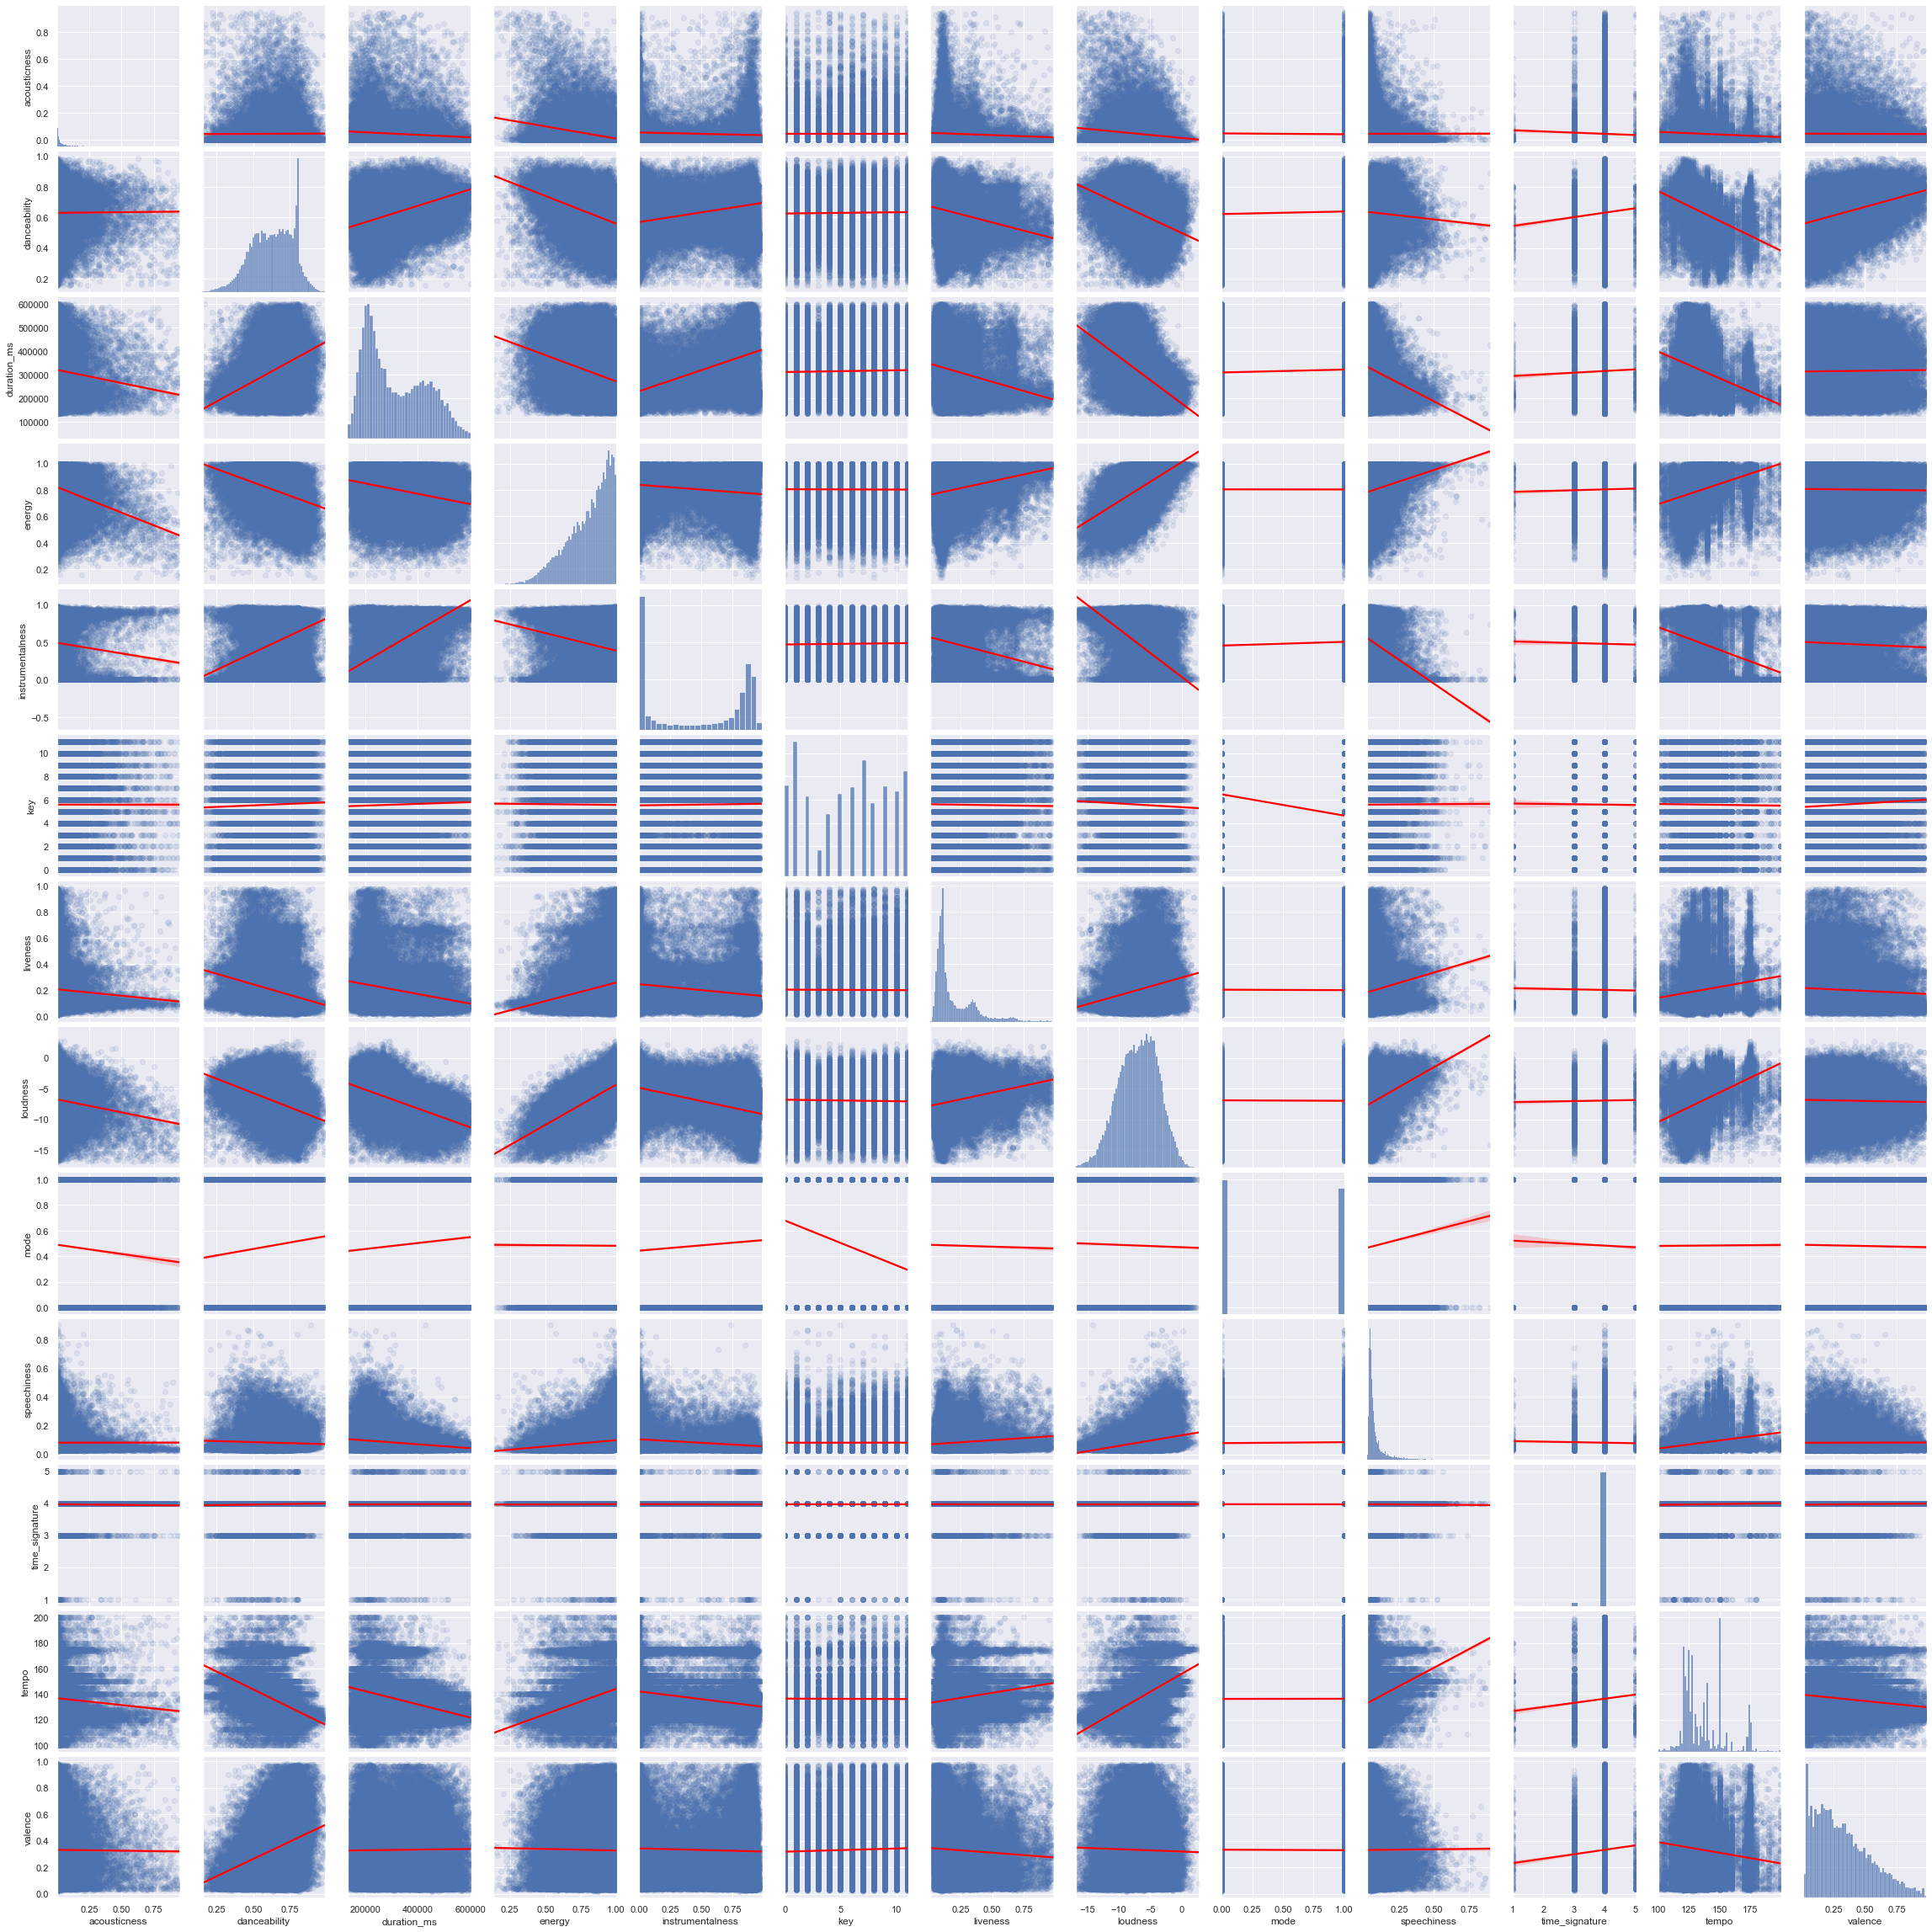

In [106]:
sns.pairplot(all_genres[audio_metrics], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

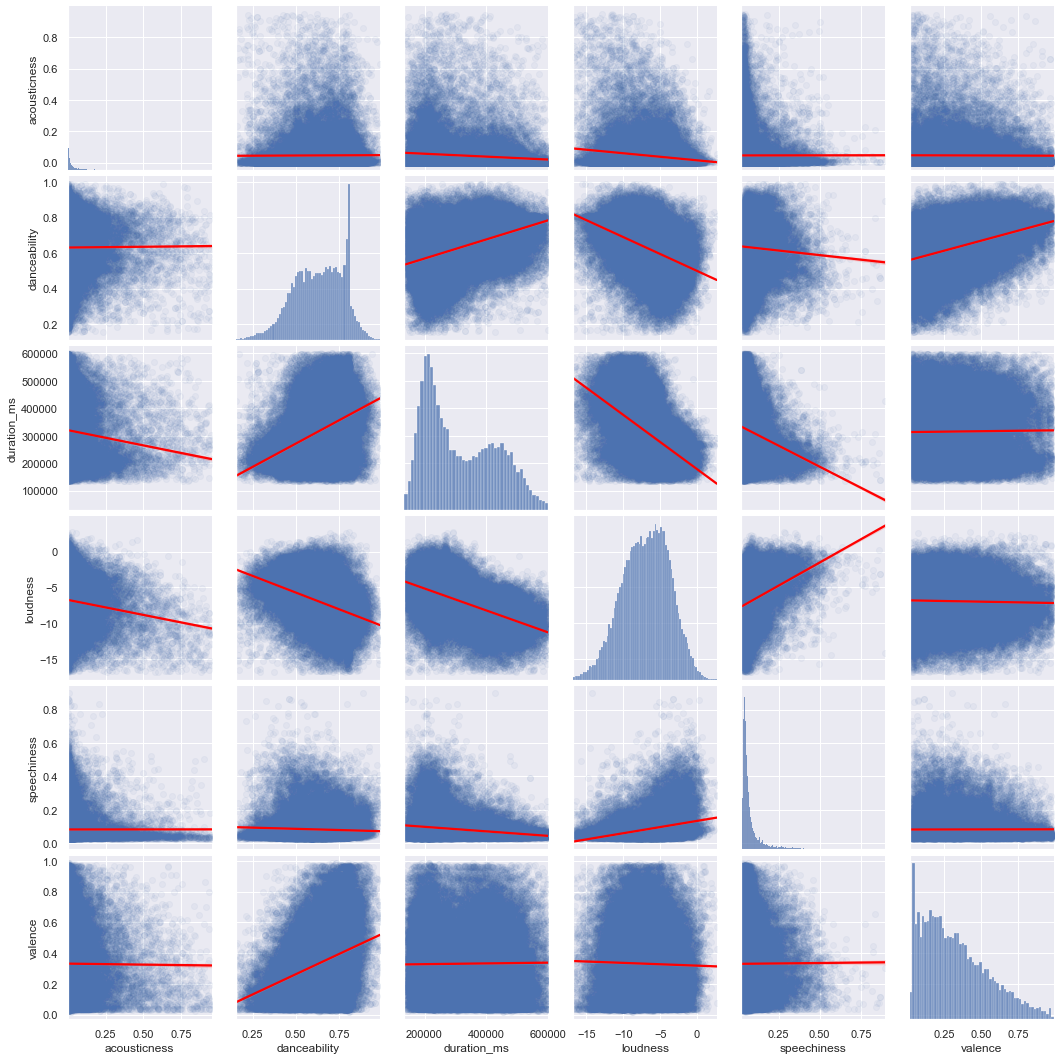

In [108]:
sns.pairplot(all_genres[['acousticness', 'danceability', 'duration_ms', 'loudness', 'speechiness', 'valence']], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}})

### Potential Pairplot Correlations

##### Acousticness
- Danceability (negative, quadratic), Instrumentalness (positive, quadratic), Loudness (negative, quadratic),Speechiness (negative, polynomial)

##### Danceability
- Duration (positive, linear), Tempo (negative, linear), Valence (positive, linear)

##### Duration
- Loudness (negative, linear), Speechiness (negative, linear/quadratic)

##### Energy
- Loudness (positive, linear)

##### Instrumentalness
- Nothing convincing

##### Liveness
- Acousticness (negative, linear/quadratic)

##### Loudness
- Acousticness (negative, linear), Duration (negative, linear), Energy (positive, linear)

##### Speechiness
- Acousticness (negative, quadratic)

##### Tempo
- Nothing convincing

##### Valence
- Danceability (positive, linear/quadratic)


### Correlation Matrix

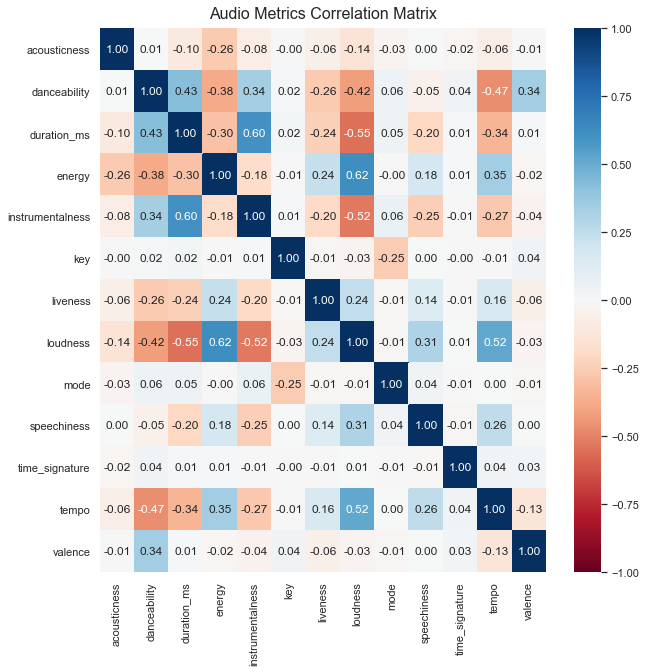

In [94]:
corr = all_genres[audio_metrics].corr()

plt.figure(figsize=[10,10])
ax = plt.axes()
plt.rcParams.update({'font.size': 12})
ax.set_title('Audio Metrics Correlation Matrix', fontsize=16, pad=10)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu', annot=True, fmt='.2f', vmin=-1.0)
plt.show();

#### Correlation Matrix Conclusions:
There are a few fairly correlated variables, but the highest correlation in the entire feature set is just 62% (energy and loudness). Danceabiliy, duration, loudness, and tempo all have moderate correlations with several other features, but I do not feel compelled to eliminate any variables on the basis of high correlation. This is particularly true because most classification models can handle multicollinearity without performance issues.

In [129]:
%%html
<style>
table {float:left}
</style>

## Genre-Specific EDA

In [18]:
audio_metrics = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 
                 'loudness', 'mode', 'speechiness', 'time_signature', 'tempo', 'valence']

In [19]:
sns.set(font_scale=2.0)
#plt.rcParams['text.color'] = 'white'
#plt.rcParams['axes.labelcolor'] = 'white'
#plt.rcParams['xtick.color'] = 'white'
#plt.rcParams['ytick.color'] = 'white'

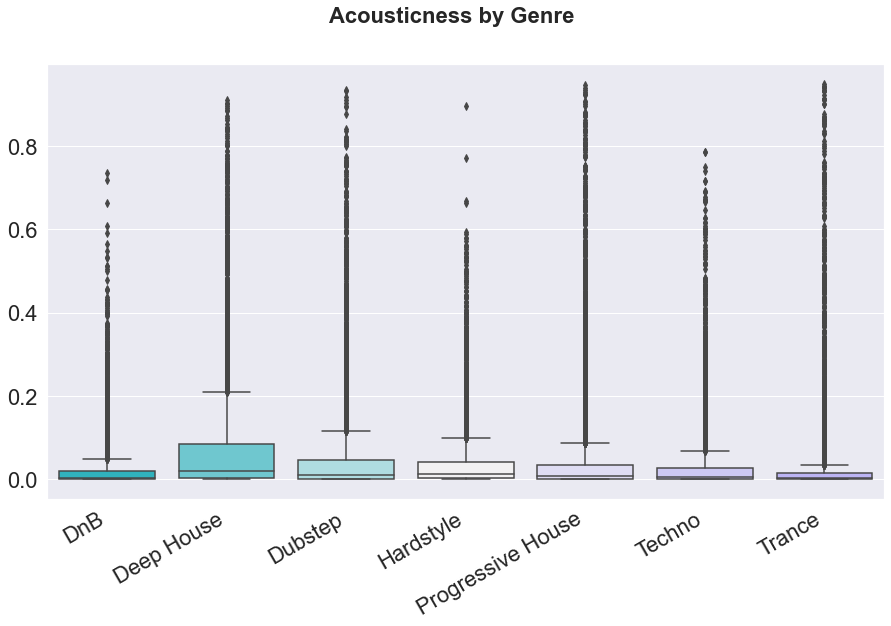

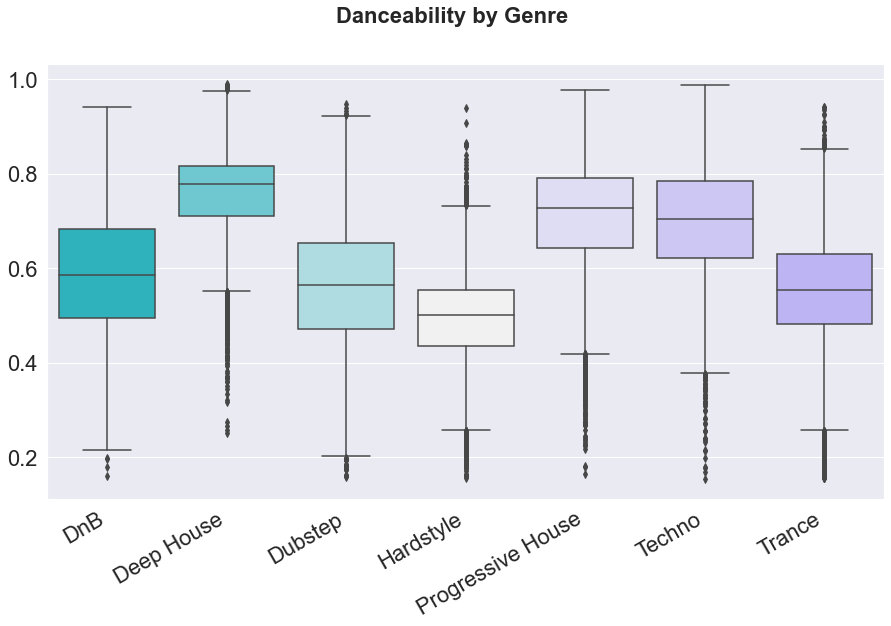

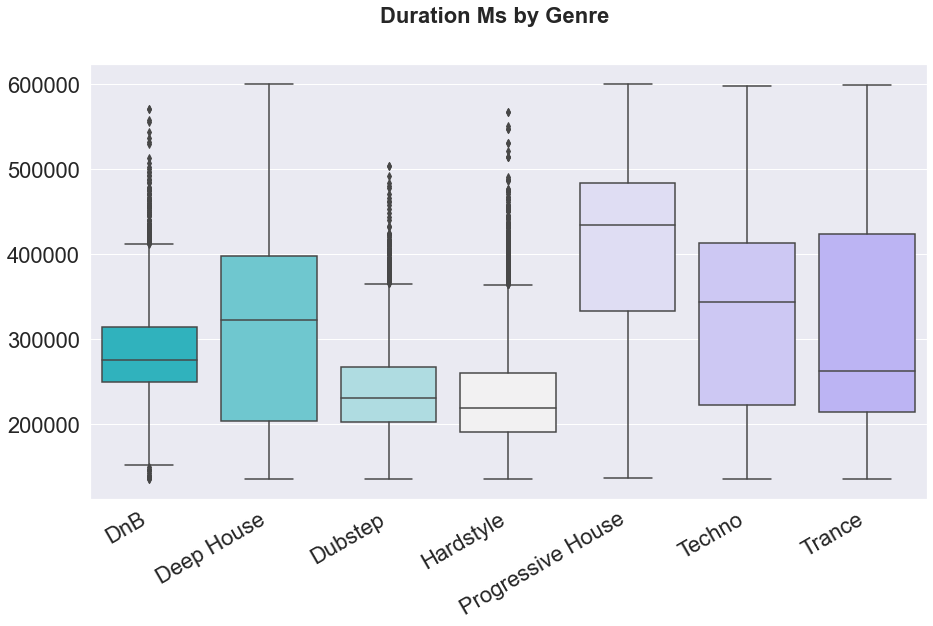

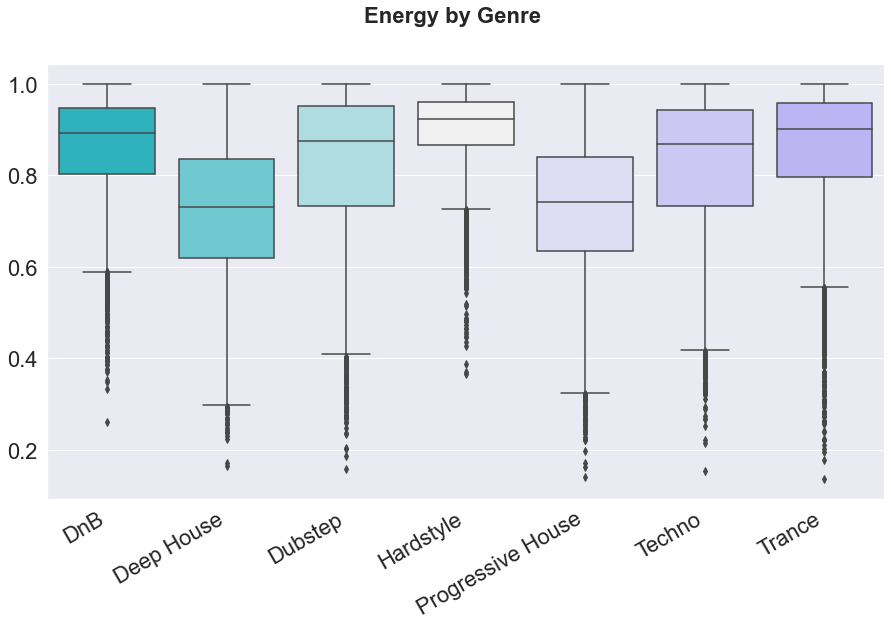

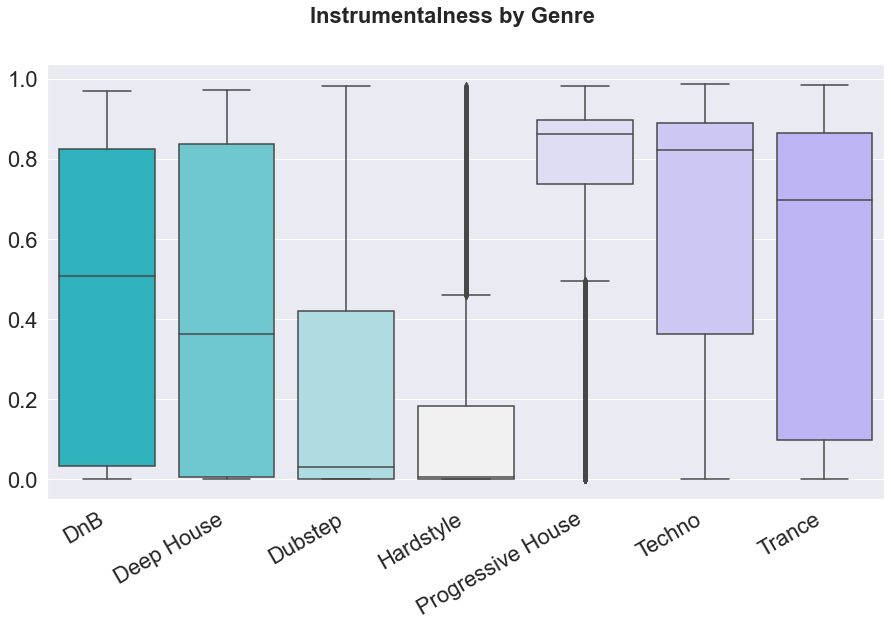

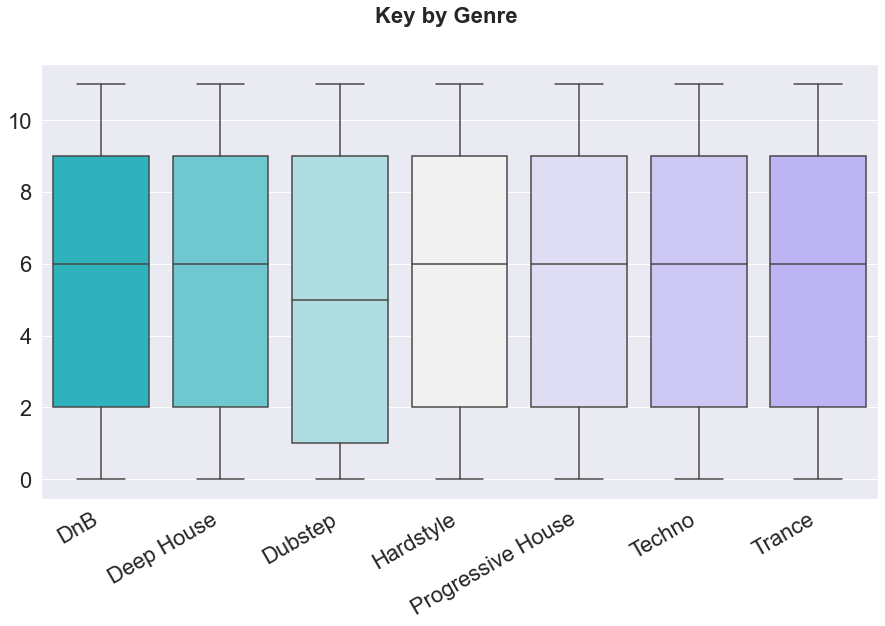

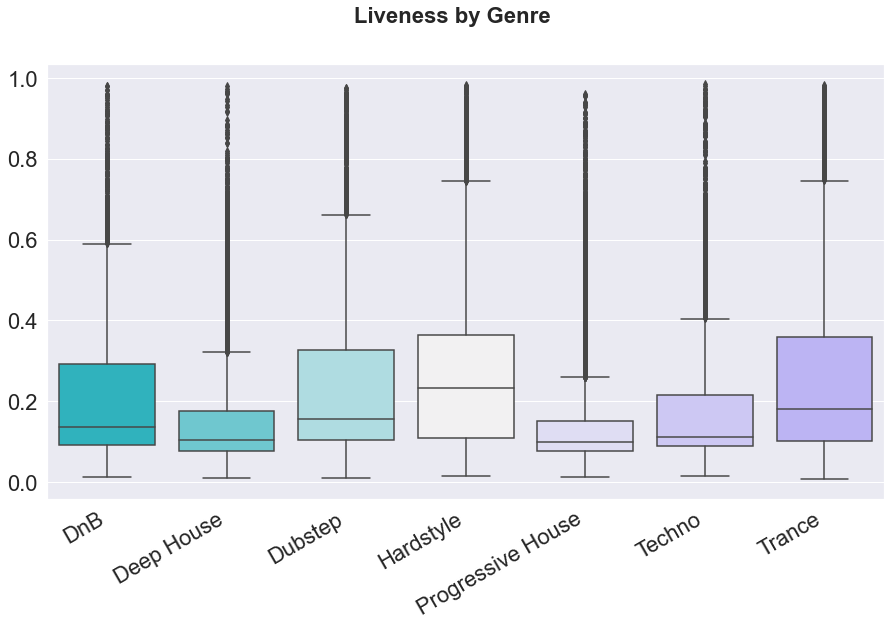

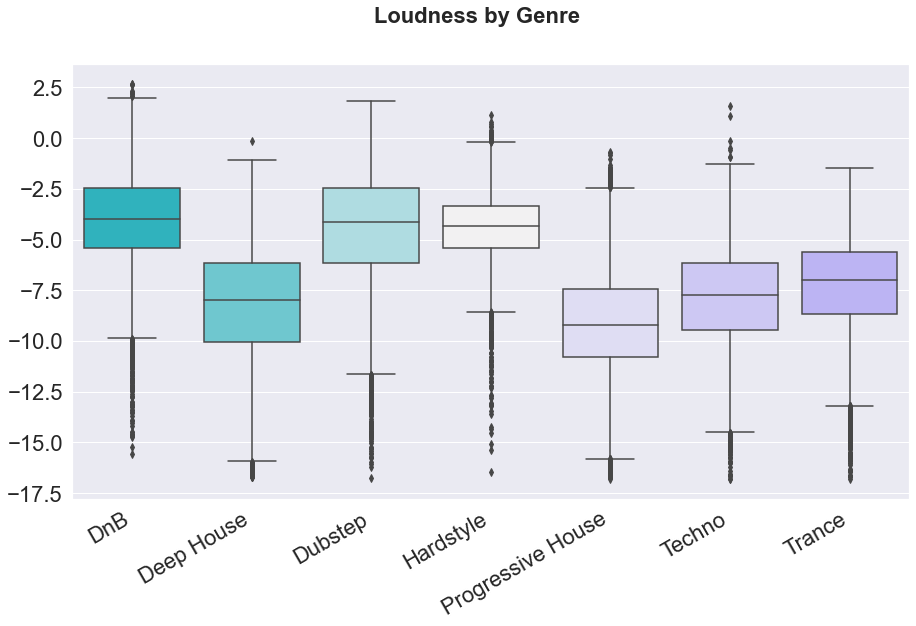

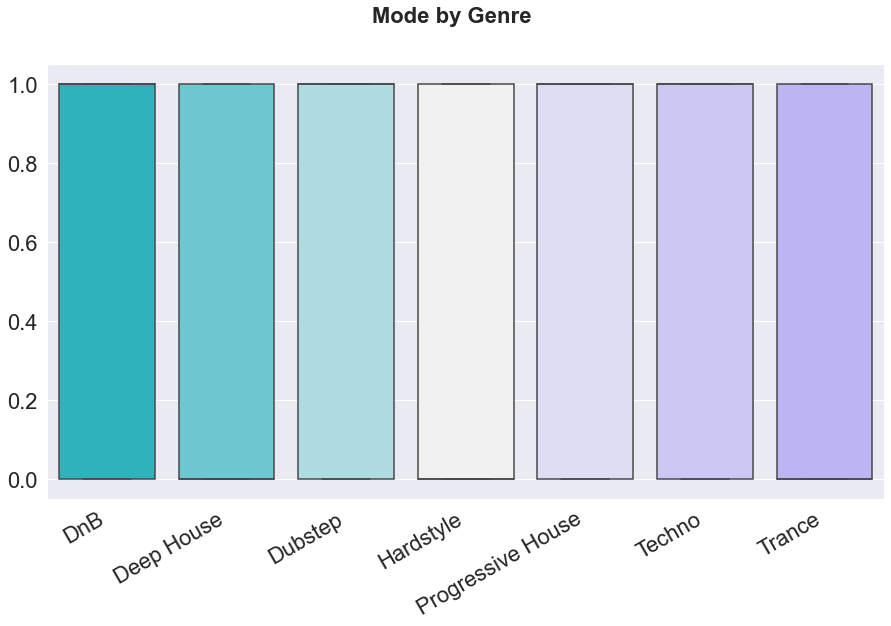

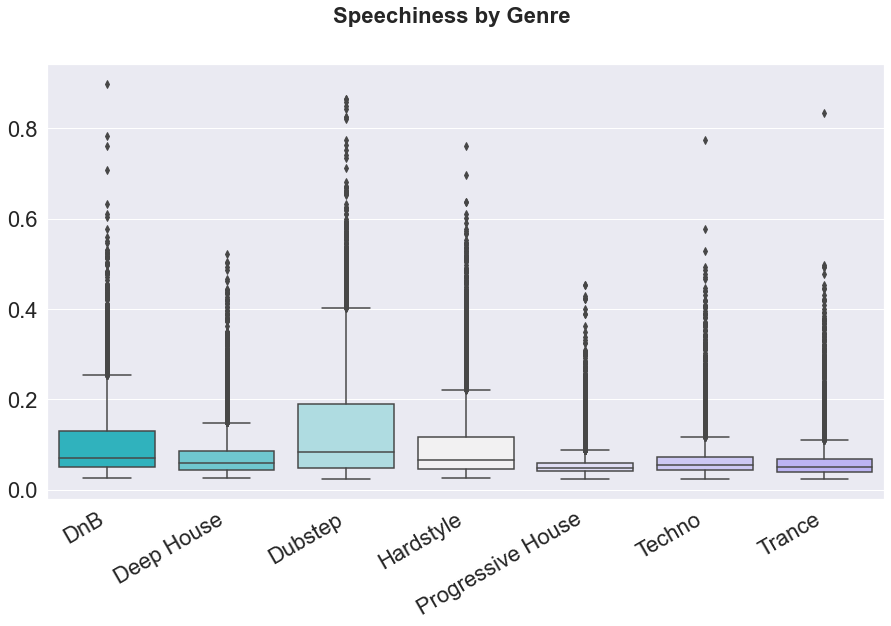

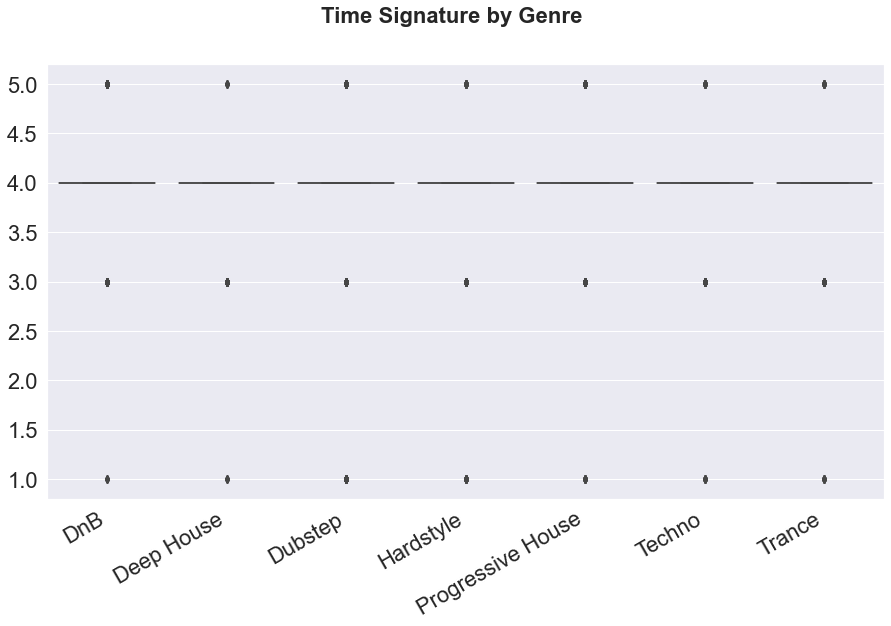

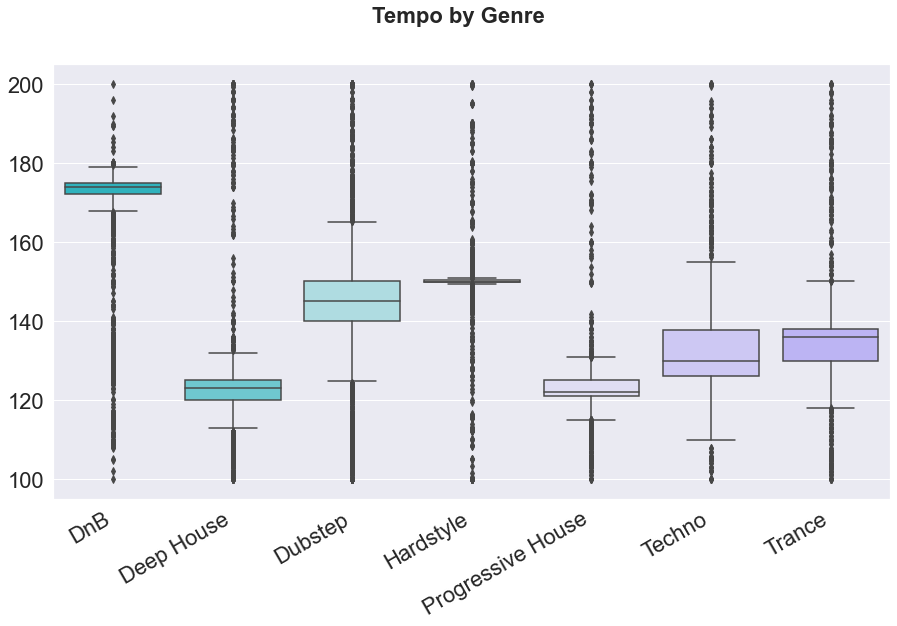

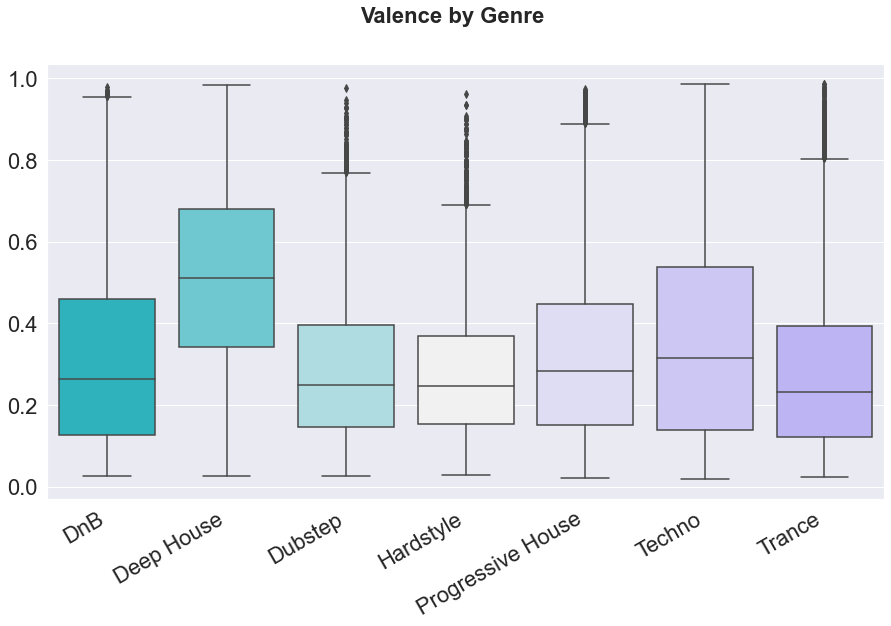

In [20]:
# Display boxplot by genre for each audio feature
for metric in audio_metrics:
    fig = plt.figure(figsize=[15,8])
    fig.suptitle(metric.replace('_', ' ').title() + ' by Genre', fontweight='bold', fontsize=22)
    fig.patch.set_alpha(0)
    ax = sns.boxplot(x='genre', y=metric, data=all_genres, palette=sns.diverging_palette(205, 270, s=98, l=73, n=7), showfliers=True)
    ax.set_xticklabels(['DnB', 'Deep House', 'Dubstep', 'Hardstyle', 'Progressive House', 'Techno' , 'Trance'], rotation=30, ha='right')
    ax.set(xlabel=None, ylabel=None)
    #plt.savefig(metric.replace('_', ' ').title() + ' by Genre', bbox_inches="tight")
    plt.show(); 

#### Tempo Distribution by Genre

Tempo is a clear favorite for the most important audio feature for classification purposes, but there appear to be many outliers for all genres. See below for a density plot by genre.

In [27]:
all_genres = all_genres.sort_values('genre')
all_genres_recs = all_genres_recs.sort_values('genre')

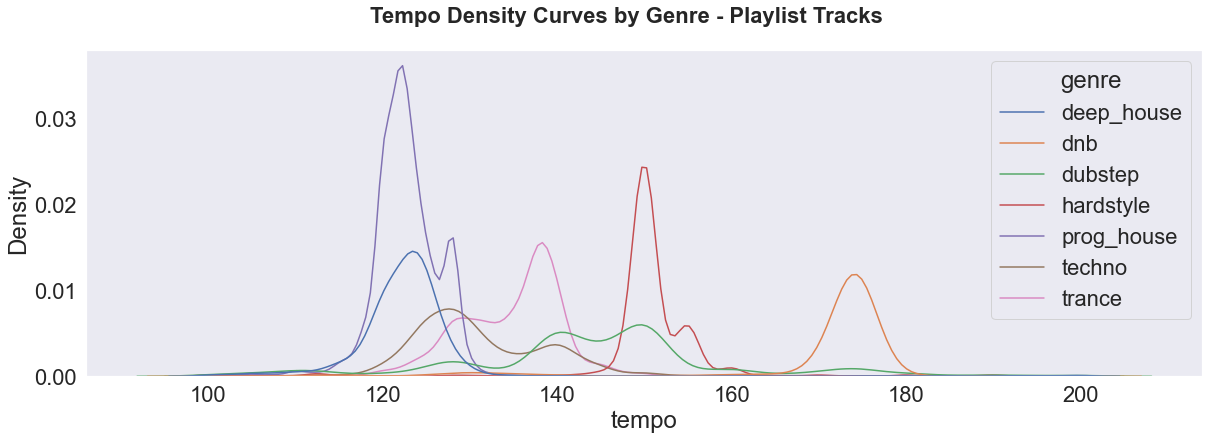

In [24]:
fig, ax = plt.subplots(figsize=[20, 6])
plt.suptitle('Tempo Density Curves by Genre - Playlist Tracks', fontweight='bold', fontsize=22)
sns.kdeplot(data=all_genres, x='tempo', hue='genre',  ax=ax)
plt.grid(False)
plt.show();

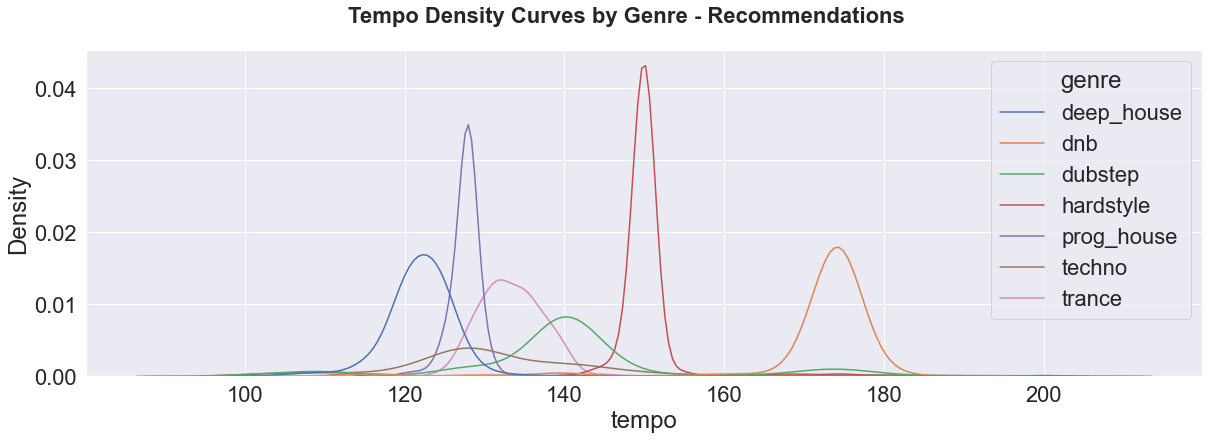

In [28]:
fig, ax = plt.subplots(figsize=[20, 6])
plt.suptitle('Tempo Density Curves by Genre - Recommendations', fontweight='bold', fontsize=22)
sns.kdeplot(data=all_genres_recs, x='tempo', hue='genre',  ax=ax)
plt.show();

## Deeper Dive into Tempo

Tempo appears to be the single most important audio feature in separating EDM music by genre. The subgenre IQR for tempo are quite distinct. Not surprisingly, tempo is is also the only audio feature that has a generally accepted framework. There are well established typical BPM (beats per minute) ranges for EDM subgenres. I found a nice infographic showing these typical ranges at the [Accusonus Blog](https://blog.accusonus.com/infographic-tempo-electronic-music-1128/), shown below. I found a second source with similar information at [Ableton.com](https://learningmusic.ableton.com/make-beats/tempo-and-genre.html). Below you can find the combined BPM ranges from these two sources.

See below for the current distribution of tempo in the dataset. The tempo of the tracks in the dataset tend to fall in line with the prescribed tempos by subgenre. The IQR of each subgenre is within the prescribed range (with the exception of a small deviation for Dubstep). I've already attempted to account for half-time and double-time, which is why the min and max by genre are limited to 100-200. It may be worth erasing values outside of the prescribed ranges and imputing some new tempo value. 

The imputation approach for testing data is fairly straightforward. Given that we will not know the subgenre at the time of testing, it would be unreasonable to look at subgenre tempo ranges to impute new tempos. Instead, we could only impute new tempos for testing data whose tempos fall outside of the ***total*** prescribed range (115-180 BPM). This would likely miss a large quantity of erroneous tempo data, but in the entire dataset (after half-time and double-time adjustment), 5-6% of the tracks have tempo outside of this total range, so the benefit may be worth the effort. It may be, though, that the best course of action is to do no imputation at all.

The training data problem is a bit more complex. I have a few options for adjusting the tempos of the training data:
1. Impute the median subgenre tempo for all training data whose tempo falls outside of the prescribed range. This would almost certainly improve the training score of my classification models, but the concern is that it would not generalize well. The model will not know when the tempo of testing data has fallen outside of its prescribed subgenre range, because the subgenre will not be known.
2. Impute the closer of the upper or lower limit of the prescribed subgenre range for all training data whose tempo falls outside of the prescribed range. This method assumes that the lower or upper limit would be a better approximation of the true tempo than simply using the median. This methodology has the same concern around generalization.
3. Apply the same methodology as for the testing data, only imputing new tempo values when the tempo falls outside of the total prescribed range (115-180 BPM). This methodolgy is likely to generalize better than options 1 and 2. While the training data will be less accurate in total, and the training score will be lower, the predictive value of the model should be higher. 
4. Again, doing nothing may be best.

***Option 3 is the preferred method.*** In the interest of better predictions and lower generalization error, I will impute new tempo values for all training and testing data whose tempo falls outside of the 115-180 BPM range. I will use nearest neighbor imputation in the modeling workbook to acommplish this. However, there may be predictive value in the variance from the prescribed ranges.



#### Combined Accusonus/Ableton BPM Ranges

| Subgenre      | BPM         |
| ------------- | ----------- |
| House         | 115-130     |
| Techno        | 120-160     |
| Trance        | 120-135     |
| Dubstep       | 130-145     |
| Hardstyle     | 150         |
| Drum'n'Bass   | 160-180     |


In [150]:
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.quantile(0.75)

genre_tempo = all_genres.groupby('genre')[['tempo']].agg({'tempo' : ['min', q1, 'median', q2, 'max']})

#### Subgenre Five Number Summary

In [156]:
genre_tempo

tempo                                      
                min       q1   median         q2      max
genre                                                    
deep_house  100.004  120.012  122.998  124.98900  199.990
dnb         100.046  172.074  174.004  174.95675  199.980
dubstep     100.001  139.929  145.004  150.04000  199.998
hardstyle   100.002  149.957  150.013  150.35800  199.976
prog_house  100.000  120.991  122.015  124.99700  199.986
techno      100.001  125.998  129.986  137.85225  199.994
trance      100.000  130.020  136.017  138.04200  199.998

### Tempo Infographics

**Source:** [Accusonus Blog](https://blog.accusonus.com/infographic-tempo-electronic-music-1128/)

<img src='notebook_images/tempo_graphic.png' width=400>



**Source:** [Ableton](https://learningmusic.ableton.com/make-beats/tempo-and-genre.html)

<img src='notebook_images/tempo_ableton.png' width=400>

# Dummy Variables
- Key - 0 through 11
- Mode - Already in dummy format
- Time Signature - 1, 3, 4, 5

In [212]:
def dummies(df):
    """
    Add dummy variable columns for key and time signature.
    """
    
    for i in sorted(df['key'].unique()):
        df['key_' + str(int(i))] = np.where(df['key'] == i, 1, 0)
    
    for i in sorted(df['time_signature'].unique()):
        df['time_sig_' + str(int(i))] = np.where(df['time_signature'] == i, 1, 0)
        
    df.drop(columns=['key', 'time_signature'], inplace=True)
    
    return df

In [214]:
all_genres_balanced = dummies(all_genres_balanced)
all_genres_recs_balanced = dummies(all_genres_recs_balanced)

# Pickle the Clean Data

In [234]:
# Pickle the raw audio data
with open('pickle_clean_audio_data.pickle', 'wb') as to_write:
    pickle.dump(all_genres_balanced, to_write)
    
# Pickle the raw audio data
with open('pickle_clean_audio_data_recs.pickle', 'wb') as to_write:
    pickle.dump(all_genres_recs_balanced, to_write)